In [1]:
import sys, os
import numpy as np

In [2]:
thisdir = os.path.dirname('__file__')
libpath = os.path.join(thisdir, '../c3dp_source')
if not libpath in sys.path:
    sys.path.insert(0, libpath)

In [3]:
import c3dp.gaugevol.gauge_volume_allchannels as gv

In [4]:
sample_height=26. #mm
sample_width=4.16 #mm

arbitrary_height= sample_height+10.
arbitrary_width=sample_width+10.
# pointsNum_z=200
# pointsNum_y=50
stepsize=0.1
# zS=np.linspace(-sample_height/2., sample_height/2., num=pointsNum_z) #sample_positions_z vertical
# yS=np.linspace(-sample_width/2., sample_width/2., num=pointsNum_y) #sample_positions_y
zS=np.arange(-arbitrary_height/2., arbitrary_height/2., stepsize) #sample_positions_z vertical
yS=np.arange(-arbitrary_width/2., arbitrary_width/2., stepsize) #sample_positions_y
# xS=np.linspace(-sample_width/2., sample_width/2., num=pointsNum) #sample_positions_x
xS=0.

In [5]:
# misaligned_offset=0.5
# misaligned_zS=zS-misaligned_offset
# misaligned_yS=yS-misaligned_offset

In [6]:
m=np.array(np.meshgrid(xS,yS,zS))
m.shape

(3, 142, 1, 360)

In [7]:
m=m.transpose(1,2,3,0)
m.shape

(142, 1, 360, 3)

In [8]:
m.shape=-1,3
m.shape

(51120, 3)

In [9]:
print m

[[  0.    -7.08 -18.  ]
 [  0.    -7.08 -17.9 ]
 [  0.    -7.08 -17.8 ]
 ...
 [  0.     7.02  17.7 ]
 [  0.     7.02  17.8 ]
 [  0.     7.02  17.9 ]]


In [10]:
number_of_channels_vertical=9.
number_of_channels_horizontal =1.
min_channel_size=3.

channel_openningHeight_sample=min_channel_size*number_of_channels_vertical #mm channel opening size
channel_openningWidth_sample=min_channel_size*number_of_channels_horizontal #mm channel opening size
collimator_inner_radius=16.02 #mm
coll_length=380. #mm
collimator_outer_radius=coll_length+collimator_inner_radius
channel_openningHeight_detector=(collimator_outer_radius*channel_openningHeight_sample)/collimator_inner_radius


In [11]:
channel_angular_size= gv.span2angle(channel_openningWidth_sample, collimator_inner_radius)
print (channel_angular_size)
# channel_curvature_from_center=channel_angular_size/2

10.698354859058567


In [12]:
offset_height=0.
offset_length=5.
Cs_cylinder = gv.make_cylindrical_surface(collimator_inner_radius, channel_angular_size, channel_openningHeight_sample,length_misalignment_offset=offset_length, height_misalignment_offset=offset_height)
Cd_cylinder = gv.make_cylindrical_surface(collimator_outer_radius, channel_angular_size, channel_openningHeight_detector,length_misalignment_offset=offset_length,height_misalignment_offset=offset_height )

In [13]:
Cs_square = gv.make_square(collimator_inner_radius, channel_openningHeight_sample, offset_height)
Cd_square = gv.make_square(collimator_outer_radius, channel_openningHeight_detector, offset_height)
sample_points = m

In [14]:
# for ind, val in enumerate(Cs_square):
#     x=gv.rotation_around_z_axis(val, 4.)
#     print (x)

In [15]:
theta_phiS = gv.theta_phi(Cs_cylinder, sample_points)
theta_phiD = gv.theta_phi(Cd_cylinder, sample_points)

In [16]:
Syz=sample_points[:,[1,2]].T
Syz.shape

(2, 51120)

In [17]:
sample_pos, gauge_volume = gv.gauge_volume(theta_phiS, theta_phiD, Syz)

<IPython.core.display.Javascript object>


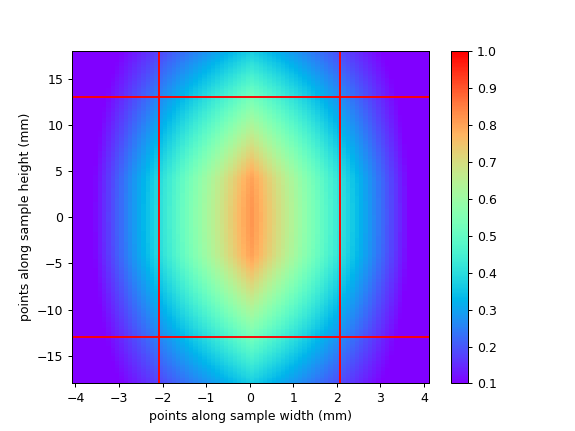

In [18]:
%matplotlib notebook
gv.making_plot(sample_pos, gauge_volume, arbitrary_height/2.,-arbitrary_height/2., sample_height, sample_width, min_color=0.1, max_color=1)

In [19]:
sample_pos.shape

(2, 6059)

<IPython.core.display.Javascript object>


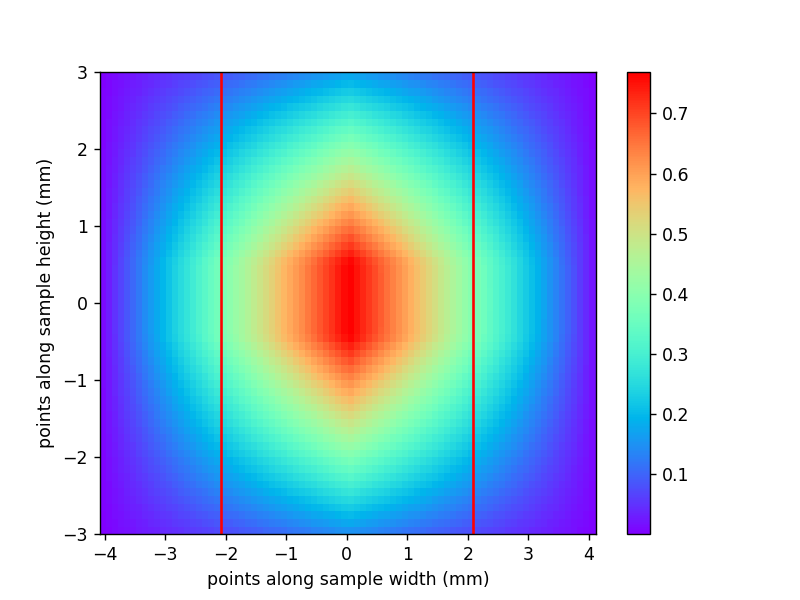

In [20]:
gv.making_plot(sample_pos, gauge_volume, 3.,-3., sample_height, sample_width)